In [1]:
from source.utils.config_manager import ConfigManager
import os
from source.dataloaders.project_2_dataloaders_factory import Project2DataLoaderFactory

path = os.path.join(ConfigManager().get_dataset_path('speech_recognition'), 'train')

In [7]:
from torch.nn import Sequential
from torchaudio import transforms

batch_size = 8
transform = Sequential(transforms.Resample(new_freq=8_000), transforms.Spectrogram())
train_loader = Project2DataLoaderFactory(path, transform_train=transform, transform_test=transform).get_train_loader(batch_size) 

In [8]:
import torchaudio

first_sample = next(iter(train_loader))



In [9]:
first_sample

[tensor([[[[8.6061e-07, 6.7791e-07, 5.4942e-08,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [9.3667e-07, 5.0809e-07, 1.7974e-07,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [9.3894e-07, 6.2739e-07, 7.8797e-07,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           ...,
           [4.0586e-11, 4.0871e-10, 1.9690e-11,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [7.8157e-11, 5.9644e-09, 4.6631e-10,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [9.6338e-12, 1.1023e-08, 1.1545e-09,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00]]],
 
 
         [[[1.9041e-02, 1.1348e-04, 2.3200e-04,  ..., 3.6563e-05,
            6.7288e-04, 1.2471e-02],
           [3.2010e-02, 9.1899e-04, 1.8408e-03,  ..., 1.2141e-02,
            7.7427e-03, 3.0229e-02],
           [1.4770e-02, 1.4670e-02, 8.4233e-03,  ..., 9.6522e-02,
            5.7975e-02, 5.5190e-02],
           ...,
           [4.0605e-07, 1.4485e-06,

class: unknown


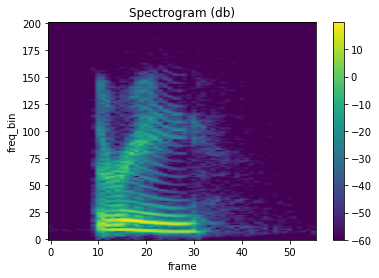

In [19]:
import torch
import librosa
import matplotlib.pyplot as plt

def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

no_sample = 7
spectogram = torch.squeeze(first_sample[0][no_sample])
print(f'class: {first_sample[1][no_sample]}')
plot_spectrogram(spectogram)

In [22]:
import IPython.display as ipd

# raw data (no spectogram transformer)
batch_size = 8
transform = Sequential(transforms.Resample(new_freq=8_000))
train_loader = Project2DataLoaderFactory(path, transform_train=transform, transform_test=transform).get_train_loader(batch_size) 


In [23]:
first_sample = next(iter(train_loader))
no_sample = 0
ipd.Audio(first_sample[0][no_sample], rate=8_000)

In [24]:
# it doesn't work in VSC

import numpy as np
import IPython
T = 2.0    # seconds
sr = 22050 # sample rate
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*440*t)                # pure sine wave at 440 Hz
IPython.display.Audio(x, rate=sr)